<img src="https://www.acatlan.unam.mx/identidad-acatlan/img/Logotipos/Escudo/escudo-b.jpg" alt="Portada" style="float: left; margin-right: 50px; width: 120px" />
<h1>Métodos Numéricos 2</h1>
<h2 style="color:#1a4996">Mtra. Teresa Carrillo Ramírez</h2>
<h2 style="color:#1a4996">Alfonso Flores Zenteno</h2>

___

# Splines Cúbicos

El método de Splines cúbicos es bastante útil ya que nos permite generar, a partir de una tabla de valores, múltiples polinomios o splines que se ajustan por cada par de puntos, lo que se conoce como aproximación polinómica fragmentaria. 
A continuación se presenta el algoritmo para obtener splines cúbicos en 5 pasos:

1. Calcular diferencias y diferencias divididas
1. Crear el sistema de ecuaciones
1. Resolver el sistema de ecuaciones
1. Calcular los coeficientes de los polinomios
1. Formar los splines

Para ejemplificar este método vamos a utilizar los siguientes puntos:

| x   | f(x) |
|-----|------|
| 2   | 2473 |
| 2.5 | 2502 |
| 3   | 2538 |
| 3.5 | 2530 |
| 4.5 | 2575 |
| 5.5 | 2608 |
| 6.5 | 2691 |
| 7.5 | 2462 |
| 8   | 2423 |

Comencemos creando una tupla con nuestros pares ordenados.

In [1]:
# Usaremos una tupla en vez de una lista ya que así garantizamos que los valores se queden intactos
puntos = ((2, 2473), (2.5, 2502), (3, 2538), (3.5, 2530), (4.5, 2575), (5.5, 2608), (6.5, 2691), (7.5, 2462), (8, 2423))

## 1. Calcular diferencias y diferencias divididas

Comenzamos calculando las diferencias las cuales se nombran **H**:$$x_{i+1} - x_{i}$$ después se calcularán las diferencias divididas con el nombre **G**: $$\frac{f_{i+1}-f{i}}{H_{i}}$$ Cabe destacar que se 'perderá' un renglón de la tabla de datos ya que el último renglón no tiene un valor extra con el cual operar.

In [2]:
# Inicializamos H y G como listas vacias
H = []
G = []

# Recorremos nuestra tupla de puntos ordenados del primer al penúltimo elemento ya que el último no tiene 
# un par subsecuente con el cual operarlo
for i in range(0,len(puntos)-1):
    H.append(puntos[i+1][0]-puntos[i][0])
    G.append((puntos[i+1][1]-puntos[i][1])/H[i])

# Comprobamos los resultados
print(H)
print(G)

[0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5]
[58.0, 72.0, -16.0, 45.0, 33.0, 83.0, -229.0, -78.0]


Es así que llegamos a la siguiente tabla:

| x   | f(x) | H   | G    |
|-----|------|-----|------|
| 2   | 2473 | 0.5 | 58   |
| 2.5 | 2502 | 0.5 | 72   |
| 3   | 2538 | 0.5 | -16  |
| 3.5 | 2530 | 1   | 45   |
| 4.5 | 2575 | 1   | 33   |
| 5.5 | 2608 | 1   | 83   |
| 6.5 | 2691 | 1   | -229 |
| 7.5 | 2462 | 0.5 | -78  |
| 8   | 2423 | -   | -    |

## 2. Crear sistema de ecuaciones

Ahora seguiremos la teoría para formar un sistema de ecuaciones de la siguiente forma: $$ A\overline{S} = \overline{b} $$ en donde nuestra matriz **A** se formará a partir del vector **H**.

In [3]:
# Creamos una función que nos permita vizualizar matrices más fácil
def printMatrix(M):
    for l in M:
        print(l)

# Inicializamos la Matriz A como una lista vacia
MA = []

# Recorremos el vector H del primer al penúltimo elemento
for i in range(0, len(H) -1):
    
    # Vector auxiliar de tamaño mayor a H para guardar 2 valores calculados más, se inicializa todo en cero
    aux = [0] * (len(H) + 1)
    
    # Se coloca sobre la diagonal el valor H[i] hasta el penúltimo elemento
    aux[i] = H[i]
    # Un espacio a la derecha se coloca el doble de la suma del elemento H[i] más H[i+1]
    aux[i+1] = 2*(H[i]+H[i+1])
    # Al siguiente espacio a la derecha se coloca el siguiente elemento en la tabla, osea el H[i+1]
    aux[i+2] = H[i+1]
    
    # Añadimos este vector a la matríz
    MA.append(aux)
    
# Verificamos el resultado
printMatrix(MA)

[0.5, 2.0, 0.5, 0, 0, 0, 0, 0, 0]
[0, 0.5, 2.0, 0.5, 0, 0, 0, 0, 0]
[0, 0, 0.5, 3.0, 1.0, 0, 0, 0, 0]
[0, 0, 0, 1.0, 4.0, 1.0, 0, 0, 0]
[0, 0, 0, 0, 1.0, 4.0, 1.0, 0, 0]
[0, 0, 0, 0, 0, 1.0, 4.0, 1.0, 0]
[0, 0, 0, 0, 0, 0, 1.0, 3.0, 0.5]


Nos podemos dar cuenta que no se trata de un matriz cuadrada ya que nos faltan 2 ecuaciones para obtener un sistema de (9x9), lo que podemos hacer es retirar la primer y última columna y quedarnos con un sistema de 7x7 como el siguiente:

In [4]:
# Inicializamos una variable auxiliar como una lista vacia
Maux = []

# Recorremos todos los renglones de la matriz
for j in MA:
    
    # Añadimos a la matriz auxiliar el renglón recortado de la matriz original
    Maux.append(j[1:len(j)-1])

# Re-asignamos la matriz modificada en la variable que contenía la matriz original
MA = Maux

# Verificamos el resultado
printMatrix(MA)

[2.0, 0.5, 0, 0, 0, 0, 0]
[0.5, 2.0, 0.5, 0, 0, 0, 0]
[0, 0.5, 3.0, 1.0, 0, 0, 0]
[0, 0, 1.0, 4.0, 1.0, 0, 0]
[0, 0, 0, 1.0, 4.0, 1.0, 0]
[0, 0, 0, 0, 1.0, 4.0, 1.0]
[0, 0, 0, 0, 0, 1.0, 3.0]


Para crear el vector independiente se sigue la siguiente fórmula que usa los valores calculados en el paso anterior en la columna G, la formula es: $$6(G[i+1] - G[i])$$ con esto podemos obtener un vector independiente de 7 elementos que se ajusta correctamente a nuestro sistema de ecuaciones como se aprecia a continuación.

In [5]:
# Inicializamos el vector independiente 'Vb' como una lista vacía
Vb = []

# Recorremos el vector G del primer al penúltimo elemento
for i in range(0, len(G) -1):
    Vb.append( 6 * (G[i+1]-G[i]) )

# Verificamos los resultados
printMatrix(Vb)

84.0
-528.0
366.0
-72.0
300.0
-1872.0
906.0


## 3. Resolver el sistema de ecuaciones

Para resolver este sistema de la forma: $$ \overline{S} = A^{-1}\overline{b} $$
utilizaremos el método de intercambio para obtener la matriz inversa. Este es método directo que consiste en invertir matrices en el mismo sitio donde se tiene a la matriz original, destruyéndose ésta y sin tener la necesidad de contar con almacenamiento
adicional para guardar la inversa.

In [6]:
# Esta variable representa la dimensión de nuestra matriz porque sabemos que es una matriz cuadrada
N = len(MA)

# Creamos dos listas con los índices posibles a tomar por el pivote
i_l = list(range(0, N))
j_l = list(range(0, N))

# Se deben tomar en cuenta N pivotes y N iteraciones para cubrir toda la matriz
for iteracion in range(0,N):

    # Para encontrar el pivote hacemos lo siguiente en cada iteración
    biggest = 0
    pivot = 0
    
    # Encontramos el pivote dentro de las listas de índices (i, j) posibles
    for u in i_l:
        for v in j_l:
            if(abs(MA[u][v]) > biggest):
                biggest = MA[u][v]
                pivot = (u, v)


    # Operaciones sobre la matriz con el pivote

    # Dividir los elementos del renglón pivote entre el pivote y cambiarles el signo excepto el pivote
    for a in range(0, N):
        if( a != pivot[1] ):
            MA[pivot[0]][a] = -MA[pivot[0]][a]/biggest

    # Sumar a los elementos de todos los renglones  diferentes al del pivote, 
    # con excepción de los que estén en la columna del pivote, los correspondientes 
    # elementos del renglón del pivote (ya corregido) multiplicado por el elemento correspondiente en la columna del pivote
    for a in range(0, N):   
        for b in range(0, N):
            if( a != pivot[0] and b != pivot[1] ):
                MA[a][b] = MA[a][b] + ( MA[pivot[0]][b] * MA[a][pivot[1]] )

    #  Dividir todos los elementos de la columna del pivote entre el propio pivote (excepto el elemento pivote).
    for b in range(0, N):
        if( b != pivot[0] ):
            MA[b][pivot[1]] = MA[b][pivot[1]] / biggest

    # Reemplazar el elemento pivote por su recíproco.
    MA[pivot[0]][pivot[1]] = 1/MA[pivot[0]][pivot[1]]

    # Eliminamos de las listas los índices del pivote
    i_l.remove(pivot[0])
    j_l.remove(pivot[1])
    
# Verificamos la matriz inversa
printMatrix(MA)

[0.5350435949027499, -0.14017437961099932, 0.025653923541247483, -0.006874580818242789, 0.0018443997317236752, -0.0005030181086519114, 0.00016767270288397049]
[-0.14017437961099932, 0.5606975184439973, -0.10261569416498993, 0.027498323272971158, -0.007377598926894701, 0.0020120724346076456, -0.0006706908115358819]
[0.025653923541247483, -0.10261569416498993, 0.3848088531187122, -0.10311871227364185, 0.027665995975855128, -0.007545271629778671, 0.0025150905432595573]
[-0.0068745808182427886, 0.027498323272971154, -0.10311871227364185, 0.29560697518444, -0.07930918846411804, 0.021629778672032196, -0.007209926224010731]
[0.0018443997317236752, -0.007377598926894701, 0.027665995975855128, -0.07930918846411804, 0.289570757880617, -0.07897384305835009, 0.026324614352783365]
[-0.0005030181086519114, 0.0020120724346076456, -0.007545271629778671, 0.021629778672032196, -0.07897384305835009, 0.29426559356136817, -0.09808853118712274]
[0.00016767270288397049, -0.0006706908115358819, 0.002515090543

In [7]:
# Guardamos el vector resultado en esta lista vacía
VS = list()

# Ahora multiplicamos la matriz inversa que se encuentra en 'MA' por el vector independiente 'b'
for i in range(0, N):
    result = 0
    for j in range(0, N):
        result += MA[i][j] * Vb[j]
    VS.append(result)

printMatrix(VS)

130.48692152917505
-353.94768611670025
229.30382293762574
-144.93762575452718
278.44668008048285
-668.8490945674043
524.9496981891348


## 4. Calcular los coeficientes

Con el vector resultado S que obtuvimos en el paso anterior podemos añadir otra columna a nuestra tabla de valores pero hay que ser cuidadosos ya que al eliminar la primer y última columna se deben anotar ceros en el primer y último renglón como se ve a continuación:

| x   | f(x) | H   | G    | S   |
|-----|------|-----|------|-----|
| 2   | 2473 | 0.5 | 58   |  0  |
| 2.5 | 2502 | 0.5 | 72   | 130.487  |
| 3   | 2538 | 0.5 | -16  | -353.948 |
| 3.5 | 2530 | 1   | 45   | 229.304  |
| 4.5 | 2575 | 1   | 33   | -144.937 |
| 5.5 | 2608 | 1   | 83   | 278.446  |
| 6.5 | 2691 | 1   | -229 | -668.85  |
| 7.5 | 2462 | 0.5 | -78  | 524.95   |
| 8   | 2423 | -   | -    |  -       |

Como se ha visto hasta ahora al proporcionar 9 puntos $$(x, f(x))$$ debemos encontrar 8 splines que unan todos los puntos. Al tratarse de splines cúbicos de la forma $$Ax^3+Bx^2+Cx+D$$ podemos deducir que para cada polinomio debemos encontrar 4 coeficientes, lo que nos da un total de 32 coeficientes a determinar, pero con ayuda de nuestra tabla de datos y de las siguientes fórmulas podemos calcularlos fácilmente:
$$ a_i =  \frac{S_{i+1}-S_i}{6h_i} $$

$$ b_i = \frac{S_i}{2} $$

$$ c_i = \frac{f(x)_{i+1}-f(x)_i}{h_i} - (\frac{S_{i+1}+2S_i}{6}) h_i $$

$$ d_i = F(x)_i$$

In [8]:
# Añadimos un cero al inicio y otro al final de nuestro vector 'S'
VS.insert(0,0)
VS.append(0)


# Inicializamos vectores vacios de coeficientes
A = []
B = []
C = []
D = []

# Recorremos desde el primer elemento de S hasta el penúltimo
for k in range(0, len(VS)-1 ):
    
    # Aplicamos las funciones para calcular 4 coeficientes en cada iteración 
    A.append( (VS[k+1] - VS[k])/(6*H[k]) )
    B.append( VS[k]/2 )
    aux = ((VS[k+1] + (2*VS[k]))/6)*H[k]
    C.append( ((puntos[k+1][1] - puntos[k][1])/H[k]) - aux )
    D.append(puntos[k][1])


In [9]:
# Observamos los coeficientes calculados
print('|      A      |      B      |      C      |      D      |')
for i in range(0, len(A)):
    print('| %0.8f | %0.8f | %0.8f | %0.8f |' % (A[i], B[i], C[i], D[i]) )

|      A      |      B      |      C      |      D      |
| 43.49564051 | 0.00000000 | 47.12608987 | 2473.00000000 |
| -161.47820255 | 65.24346076 | 79.74782025 | 2502.00000000 |
| 194.41716968 | -176.97384306 | 23.88262911 | 2538.00000000 |
| -62.37357478 | 114.65191147 | -7.27833669 | 2530.00000000 |
| 70.56405097 | -72.46881288 | 34.90476190 | 2575.00000000 |
| -157.88262911 | 139.22334004 | 101.65928907 | 2608.00000000 |
| 198.96646546 | -334.42454728 | -93.54191818 | 2691.00000000 |
| -174.98323273 | 262.47484909 | -165.49161636 | 2462.00000000 |


## 5. Formamos los Splines

Lo último que nos resta es generar los splines y definir los rangos para los que son válidos. Ya que cada spline une a dos puntos de nuestra tabla original, cada splines tendrá un dominio en el rango formado por dichos puntos subsecuentes. $$[x_i, x_{i+1}]$$

Definamos ahora una función que nos regrese el valor correcto por casos.

In [10]:
def splineCubico(x):
    '''
    Función que recibe un punto 'x' y regresa su evaluación 'f(x)' si este se encuentra dentro de algún intervalo válido.
    Las evaluaciones son realizadas con splines cúbicos, hay un spline entre cada par de puntos.
    
    '''
    
    # Usaremos todos los posibles valores de x 
    v = [2, 2.5, 3, 3.5, 4.5, 5.5, 6.5, 7.5, 8]
    
    # Casos según el dominio de cada polinomio
    if x >= v[0] and x < v[1] :
        return A[0]*((x-v[0])**3) + B[0]*((x-v[0])**2) + C[0]*((x-v[0])) + D[0]
    
    elif x >= v[1] and x < v[2] :
        return A[1]*((x-v[1])**3) + B[1]*((x-v[1])**2) + C[1]*(x-v[1]) + D[1]
    
    elif x >= v[2] and x < v[3] :
        return A[2]*((x-v[2])**3) + B[2]*((x-v[2])**2) + C[2]*(x-v[2]) + D[2]
    
    elif x >= v[3] and x < v[4] :
        return A[3]*((x-v[3])**3) + B[3]*((x-v[3])**2) + C[3]*(x-v[3]) + D[3]
    
    elif x >= v[4] and x < v[5] :
        return A[4]*((x-v[4])**3) + B[4]*((x-v[4])**2) + C[4]*(x-v[4]) + D[4]
    
    elif x >= v[5] and x < v[6] :
        return A[5]*((x-v[5])**3) + B[5]*((x-v[5])**2) + C[5]*(x-v[5]) + D[5]
    
    elif x >= v[6] and x < v[7] :
        return A[6]*((x-v[6])**3) + B[6]*((x-v[6])**2) + C[6]*(x-v[6]) + D[6]
    
    elif x >= v[7] and x <= v[8] :
        return A[7]*((x-v[7])**3) + B[7]*((x-v[7])**2) + C[7]*(x-v[7]) + D[7]
    
    else:
        return 0

Ahora que tenemos una función por casos encargada de evaluar cada punto que le demos dentro del rango $[2,8]$, podemos utilizar la librería **matplotlib** para graficar una gran cantidad de puntos y visualizar cómo funcionan los splines que calculamos.

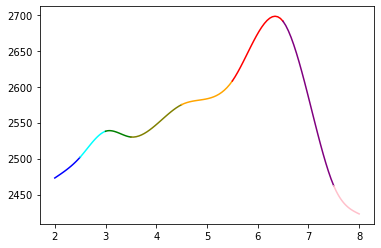

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Cantidad de puntos a generar por cada intervalo
n = 20

# Creamos arreglos con n números entre cada par de puntos, así barremos todo el dominio [2,8] con 160 puntos
r1 = np.linspace(2,2.5,n)
r2 = np.linspace(2.5,3,n)
r3 = np.linspace(3,3.5,n)
r4 = np.linspace(3.5,4.5,n)
r5 = np.linspace(4.5,5.5,n)
r6 = np.linspace(5.5,6.5,n)
r7 = np.linspace(6.5,7.5,n)
r8 = np.linspace(7.5,8,n)

# Ahora evaluamos todos los puntos con nuestra función de splines cúbicos y asignamos a cada intervalo un color diferente.
plt.plot(r1, [splineCubico(i) for i in r1], color="blue")
plt.plot(r2, [splineCubico(i) for i in r2], color="cyan")
plt.plot(r3, [splineCubico(i) for i in r3], color="green")
plt.plot(r4, [splineCubico(i) for i in r4], color="olive")
plt.plot(r5, [splineCubico(i) for i in r5], color="orange")
plt.plot(r6, [splineCubico(i) for i in r6], color="red")
plt.plot(r7, [splineCubico(i) for i in r7], color="purple")
plt.plot(r8, [splineCubico(i) for i in r8], color="pink")

# Finalmente graficamos los splines
plt.show()

Se puede observar que al generar 8 splines cúbicos tenemos un buen ajuste de la función descrita a partir de los puntos proporcionados.